 # Домашнее задание 1. Линейные модели

### Фамилия Имя Группа
Ставропольцев Артём ИУ8-83

В зависимости от варианта, для решения задачи используйте следующие наборы данных:

<table>
    <thead>
         <tr>
            <th colspan=1>Задача классификации</th>
            <th colspan=5>Задача регрессии</th>
        </tr>
        <tr>
            <th> </th>
            <th>A</th>
            <th><font color="#008000">B</font></th>
            <th>C</th>
            <th>D</th>
            <th>E</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>K</td>
            <td>1</td>
            <td>2</td>
            <td>3</td>
            <td>4</td>
            <td>5</td>
        </tr>
        <tr>
            <td>L</td>
            <td>6</td>
            <td>7</td>
            <td>8</td>
            <td>9</td>
            <td>10</td>
        </tr>
        <tr>
            <td><font color="#008000">M</font></td>
            <td>11</td>
            <td><font color="#008000">12</font></td>
            <td>13</td>
            <td>14</td>
            <td>15</td>
        </tr>
        <tr>
            <td>N</td>
            <td>16</td>
            <td>17</td>
            <td>18</td>
            <td>19</td>
            <td>20</td>
        </tr>
        <tr>
            <td>O</td>
            <td>21</td>
            <td>22</td>
            <td>23</td>
            <td>24</td>
            <td>25</td>
        </tr>
    </tbody>
</table>

### Наборы данных

**Задача регрессии**

A. [Набор данных](https://www.kaggle.com/aungpyaeap/fish-market) Таблица `Fish.csv`. Задача: построить модель, предсказывающую вес рыбы (колонка `Weight`). Baseline: RMSE (root mean square error) = 83.7

B. [Набор данных](https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho) Таблица `Car details v3.csv`. Задача: построить модель, предсказывающую стоимость автомобиля (колонка `selling_price`). Baseline: RMSE (root mean square error) = 110000

C. [Набор данных](https://www.kaggle.com/quantbruce/real-estate-price-prediction) Таблица `Real estate.csv`. Задача: построить модель, предсказывающую стоимость квадратного метра жилья (колонка `Y house price of unit area`). Baseline: RMSE (root mean square error) = 8

D. [Набор данных](https://www.kaggle.com/mirichoi0218/insurance) Таблица `insurance.csv`. Задача: построить модель, предсказывающую стоимость медицинской страховки (колонка `charges`). Baseline: RMSE (root mean square error) = 5800

E. [Набор данных](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/) Объединить таблицы `winequality-white.csv` и `winequality-red.csv`. Задача: построить модель, предсказывающую качество вина (колонка `quality`). Baseline: RMSE (root mean square error) = 0.8


---

**Задача классификации**

K. [Набор данных](https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/data) Таблица `train.csv`. Задача: детектировать токсичные комментарии (0 или 1 в колонке `toxic`) исключительно по содержимому комментария (колонка `comment_text`). Baseline: sklearn.metrics.f1_score(average='macro') по колонке `toxic` = 0.86

L. [Набор данных](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset) Таблица `WA_Fn-UseC_-HR-Employee-Attrition.csv`. Задача: предсказать увольнение сотрудника (колонка `attrition`). Baseline: sklearn.metrics.f1_score(average='macro') = 0.70

M. [Набор данных](https://www.kaggle.com/uciml/sms-spam-collection-dataset) Таблица `spam.csv` (при загрузку датасета в питоне использовать кодировку encoding='latin-1'). Задача: детектировать, является ли СМС-сообщение спамом. Baseline: sklearn.metrics.f1_score(average='macro') = 0.95

N. [Набор данных](https://www.kaggle.com/uciml/pima-indians-diabetes-database) Таблица `diabetes.csv`. Задача: детектировать, есть ли у человека диабет. Baseline: sklearn.metrics.f1_score(average='macro') = 0.73

O. [Набор данных](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset) Таблица `healthcare-dataset-stroke-data.csv`. Задача: детектировать, был ли у человека инсульт. Baseline: sklearn.metrics.f1_score(average='macro') = 0.56


# 0. Инициализация ноутбука

Загрузка необходимых библиотек

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error as RMSE

# 1. Задача регресссии (9 баллов)

Постройте модель машинного обучения, решающую задачу регресии на вашем наборе данных. Задание считается выполненным, если соответствующая оценка качества на тестовой выборке >= baseline.

## 1.1 Загрузка данных

Загрузите данные в датафрейм при помощи функции `read_csv` блиблиотеки pandas

In [15]:
BASELINE = 110000
data = pd.read_csv('./data/Car details v3.csv')
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [16]:
print('Row count is:',len(data.axes[0]))

Row count is: 8128


In [3]:
pd.isnull(data).any()

name             False
year             False
selling_price    False
km_driven        False
fuel             False
seller_type      False
transmission     False
owner            False
mileage           True
engine            True
max_power         True
torque            True
seats             True
dtype: bool

In [4]:
correct_data = data.dropna()
pd.isnull(correct_data).any()

name             False
year             False
selling_price    False
km_driven        False
fuel             False
seller_type      False
transmission     False
owner            False
mileage          False
engine           False
max_power        False
torque           False
seats            False
dtype: bool

In [17]:
print('Row count is:',len(correct_data.axes[0]))

Row count is: 7906


## 1.2 График совместного распределения признаков


Постройте график совместного распределения количественных признаков при помощи функции pairplot библиотеки seaborn

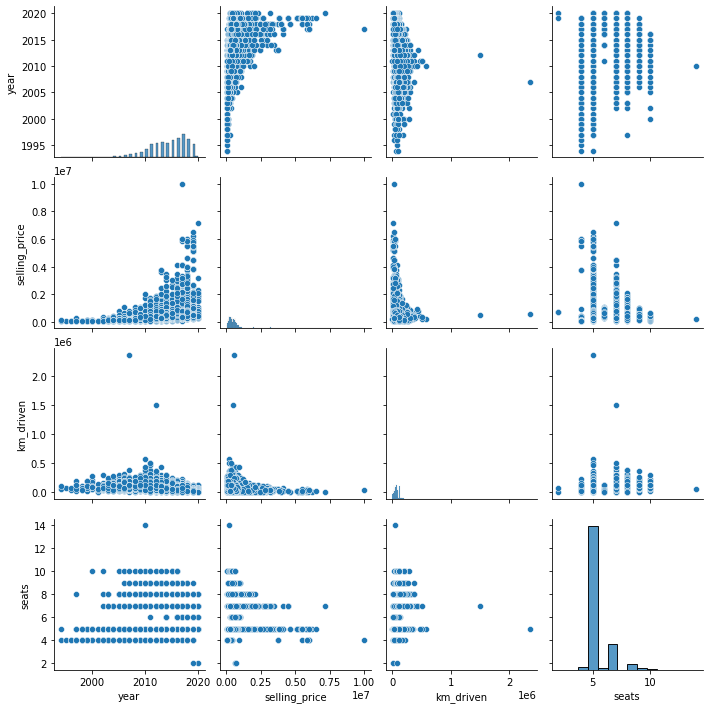

In [5]:
sns.pairplot(correct_data)

## 1.3 Разделение набора данных на тренировочный и тестовый

Разделите набор данных на тренировочный и тестовый в соотношении 80%/20% при помощи функции train_test_split библиотеки sklearn.model_selection. При необходимости категориальные признаки в числовые (например, при помощи функции get_dummies библиотеки pandas).

In [6]:
train_data, test_data = train_test_split(pd.get_dummies(correct_data),
                                         train_size=0.8,
                                         test_size=0.2)

## 1.4 OLS regression

Обучить модель линейной регрессии методом наименьших квадратов (ordinary least squares linear regression), импортировав класс `LinearRegression` из библиотеки `sklearn.linear_model`. Оцените ошибку вашей модели при помощи метрики RMSE. Посмотрите, как влияет исключение из набора данных выбросов (экстремальных значений, например, больше 95 квантиля) на оценку ошибки.



In [7]:
droped_train_data = train_data.drop(columns='selling_price')
droped_test_data = test_data.drop(columns='selling_price')

In [8]:
regression = LinearRegression()
regression.fit(droped_train_data, train_data.selling_price)

LinearRegression()

In [13]:
s = regression.score(droped_test_data, test_data.selling_price)
m = RMSE(test_data.selling_price, regression.predict(droped_test_data), squared=False)

print(f'Score: {s}')
print(f'Error: {m}')
print(f'Baseline check: {m < BASELINE}')

Score: 0.9602567403838722
Error: 167824.6347510216
Baseline check: False


## 1.5 Ridge regression

Обучить модель линейной регрессии с $L_2$-регуляризацией (Гребневая регрессия, Ridge regression), импортировав класс `Ridge` из библиотеки `sklearn.linear_model`. Оцените ошибку вашей модели при помощи метрики RMSE


## 1.6 Lasso regression

Обучить модель линейной регрессии с $L_1$-регуляризацией (Lasso regression), импортировав класс `Lasso` из библиотеки `sklearn.linear_model`. Оцените ошибку вашей модели при помощи метрики RMSE

## 1.7 Оптимизация Ridge regression

Сделайте перебор в цикле гиперпараметра `alpha` для модели `Ridge` от 0 до 1 с шагом 0.05. Постройте график ошибки RMSE на тестовых данных в зависимости от гиперпараметра `alpha`

## 1.8 Вывод

Сравните качество (величину ошибки) для моделей из пп. 1.4-1.7. Какая модель показала наилучший результат?

Ваш ответ:

# 2. Задача классификации (9 баллов)

Постройте модель машинного обучения, решающую задачу классификации на вашем наборе данных. Задание считается выполненным, если соответствующая оценка качества на тестовой выборке >= baseline.

## 2.1 Загрузка данных

Загрузите данные в датафрейм при помощи функции `read_csv` блиблиотеки `pandas`

## 2.2 Разделение набора данных на тренировочный и тестовый

Разделите набор данных на тренировочный и тестовый при помощи функции `train_test_split` библиотеки ???

## 2.3 Предобработка данных

Проведите необходимую предобработку (перенормировку, выделение главных компонент и т.д.) данных. Приведите данные к такому виду, чтобы их можно было использовать для обучения моделей.

## 2.4 Логистическая регрессия
Обучите модель логистической регрессии, используя стандартную реализацию sklearn.linear_model.LogisticRegression. Оцените метрики качества полученной модели при помощи sklearn.metrics.classification_report и sklearn.metrics.f1_score.

## 2.5 Подбор гиперпараметра регуляризации

При помощи sklearn.model_selection.GridSearchCV переберите оптимальные параметры C в диапазоне 0.01 до 1 с шагом 0.1.

## 2.6 Выводы

Сравните качество (величину ошибки) для моделей из пп. 2.4-2.5. Какая модель показала наилучший результат?

Ваш ответ: 

# 3. Самописная линейная регрессиия (3 балла)

Релизовать алгоритм построения модели линейной регрессии методом стохастического градиентного спуска (stochastic gradient descent, SGD) при помощи библиотек numpy, pytorch или tensorflow.

In [ ]:
class SGDLinearRegression:
    def __init__(self, epsilon = 0.001):
        self.w = None
        self.bias = None
        self.epsilon = epsilon
        pass

    def fit(self, X, y, iterations=500):
        # Ваш код здесь
        pass
    
    def predict(self, X):
        # Ваш код здесь
        pass


3.2 Обучите самописную модель. Воспользуйтесь sklearn.model_selection.GridSearchCV для подбора гипермапарметра (шага обновления градиента) epsilon среди `numpy.geomspace(0.0001, 1, num=13)`. Постройте график функции ошибки для epsilon `[0.0001, 0.001, 0.01, 0.1, 1]`.

3.3 Обучите модель на основе класса sklearn.linear_model.SGDRegressor с параметрами `alpha=0`. Сравните качество с вашими моделями из пункта 3.2.

Ваш вывод (2-3 предложения):

# 4. Самописная логистическая регрессиия (4 балла)

Релизовать алгоритм построения модели логистической регрессии методом стохастического градиентного спуска (stochastic gradient descent, SGD) при помощи библиотек numpy, pytorch или tensorflow.

In [ ]:
class SGDLogisticRegression:
    def __init__(self, epsilon = 0.001):
        self.w = None
        self.bias = None
        self.epsilon = epsilon
        pass

    def sigmoid(self, a):
        return  1. / (1. + np.exp(-1. * a))

    def fit(self, X, y, iterations=500):
        # Ваш код здесь
        pass


    def predict(self, X):
        # Ваш код здесь
        pass


4.2 Обучите самописную модель. Воспользуйтесь sklearn.model_selection.GridSearchCV для подбора гипермапарметра (шага обновления градиента) epsilon среди `numpy.geomspace(0.0001, 1, num=13)`. Постройте график функции ошибки для epsilon `[0.0001, 0.001, 0.01, 0.1, 1]`.

 4.3 Обучите модель на основе класса sklearn.linear_model.SGDClassifier с параметрами `loss='log'`. Сравните качество с вашими моделями из пункта 4.2.

Ваш вывод (2-3 предложения):